<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.830738,86.690350,0.000087,126.521175,126.520778,0.000397
1,0.0,1.0,31.575927,67.262980,0.000163,108.839070,108.838753,0.000317
2,0.0,2.0,42.555683,57.051423,-0.000737,109.606369,109.607074,-0.000705
3,0.0,3.0,52.695305,49.689340,0.000005,112.384650,112.384710,-0.000060
4,0.0,4.0,84.926103,47.004251,0.000273,141.930627,141.930571,0.000057
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,38.120294,39.007170,0.000003,87.127468,87.127481,-0.000013
29996,999.0,26.0,29.838145,31.538385,-0.001092,71.375437,71.376527,-0.001090
29997,999.0,27.0,74.552880,59.032782,-0.000047,143.585615,143.586019,-0.000403
29998,999.0,28.0,85.341587,35.572438,-0.001581,130.912444,130.915080,-0.002636


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.830738,86.690350,0.000087,126.521175,126.520778,0.000397
1,0.0,1.0,31.575927,67.262980,0.000163,108.839070,108.838753,0.000317
2,0.0,2.0,42.555683,57.051423,-0.000737,109.606369,109.607074,-0.000705
3,0.0,3.0,52.695305,49.689340,0.000005,112.384650,112.384710,-0.000060
4,0.0,4.0,84.926103,47.004251,0.000273,141.930627,141.930571,0.000057
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,38.120294,39.007170,0.000003,87.127468,87.127481,-0.000013
29996,999.0,26.0,29.838145,31.538385,-0.001092,71.375437,71.376527,-0.001090
29997,999.0,27.0,74.552880,59.032782,-0.000047,143.585615,143.586019,-0.000403
29998,999.0,28.0,85.341587,35.572438,-0.001581,130.912444,130.915080,-0.002636


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.830738  86.690350  0.000087  126.521175  126.520778  0.000397
      1.0    31.575927  67.262980  0.000163  108.839070  108.838753  0.000317
      2.0    42.555683  57.051423 -0.000737  109.606369  109.607074 -0.000705
      3.0    52.695305  49.689340  0.000005  112.384650  112.384710 -0.000060
      4.0    84.926103  47.004251  0.000273  141.930627  141.930571  0.000057
...                ...        ...       ...         ...         ...       ...
999.0 25.0   38.120294  39.007170  0.000003   87.127468   87.127481 -0.000013
      26.0   29.838145  31.538385 -0.001092   71.375437   71.376527 -0.001090
      27.0   74.552880  59.032782 -0.000047  143.585615  143.586019 -0.000403
      28.0   85.341587  35.572438 -0.001581  130.912444  130.915080 -0.002636
      29.0   83.232163  47.480766  0.000337  140.713267  140.713699 -0.000432

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.830738  86.690350  0.000087  126.521175  126.520778  0.000397
      1.0    31.575927  67.262980  0.000163  108.839070  108.838753  0.000317
      2.0    42.555683  57.051423 -0.000737  109.606369  109.607074 -0.000705
      3.0    52.695305  49.689340  0.000005  112.384650  112.384710 -0.000060
      4.0    84.926103  47.004251  0.000273  141.930627  141.930571  0.000057
...                ...        ...       ...         ...         ...       ...
999.0 25.0   38.120294  39.007170  0.000003   87.127468   87.127481 -0.000013
      26.0   29.838145  31.538385 -0.001092   71.375437   71.376527 -0.001090
      27.0   74.552880  59.032782 -0.000047  143.585615  143.586019 -0.000403
      28.0   85.341587  35.572438 -0.001581  130.912444  130.915080 -0.002636
      29.0   83.232163  47.480766  0.000337  140.713267  140.713699 -0.000432

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.830738,86.690350,0.000087,126.521175,126.520778,0.000397
1,0.0,1.0,31.575927,67.262980,0.000163,108.839070,108.838753,0.000317
2,0.0,2.0,42.555683,57.051423,-0.000737,109.606369,109.607074,-0.000705
3,0.0,3.0,52.695305,49.689340,0.000005,112.384650,112.384710,-0.000060
4,0.0,4.0,84.926103,47.004251,0.000273,141.930627,141.930571,0.000057
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,38.120294,39.007170,0.000003,87.127468,87.127481,-0.000013
29996,999.0,26.0,29.838145,31.538385,-0.001092,71.375437,71.376527,-0.001090
29997,999.0,27.0,74.552880,59.032782,-0.000047,143.585615,143.586019,-0.000403
29998,999.0,28.0,85.341587,35.572438,-0.001581,130.912444,130.915080,-0.002636


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.830738  86.690350  0.000087  126.521175  126.520778  0.000397
      1.0    31.575927  67.262980  0.000163  108.839070  108.838753  0.000317
      2.0    42.555683  57.051423 -0.000737  109.606369  109.607074 -0.000705
      3.0    52.695305  49.689340  0.000005  112.384650  112.384710 -0.000060
      4.0    84.926103  47.004251  0.000273  141.930627  141.930571  0.000057
...                ...        ...       ...         ...         ...       ...
999.0 25.0   38.120294  39.007170  0.000003   87.127468   87.127481 -0.000013
      26.0   29.838145  31.538385 -0.001092   71.375437   71.376527 -0.001090
      27.0   74.552880  59.032782 -0.000047  143.585615  143.586019 -0.000403
      28.0   85.341587  35.572438 -0.001581  130.912444  130.915080 -0.002636
      29.0   83.232163  47.480766  0.000337  140.713267  140.713699 -0.000432

[30000 rows x 6 columns]

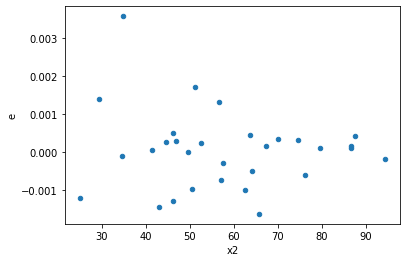

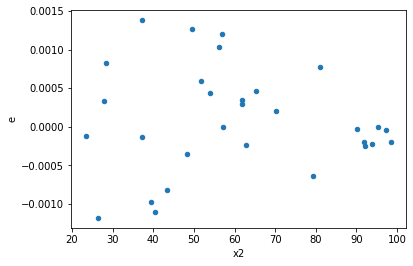

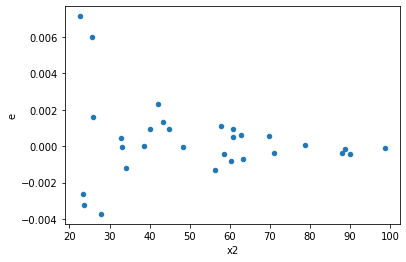

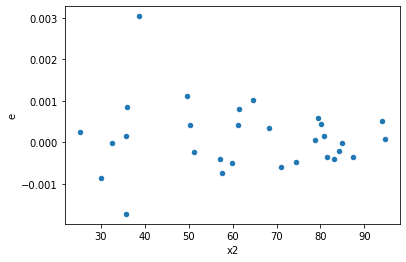

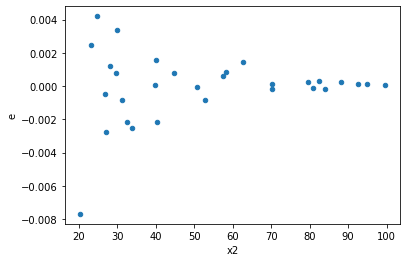

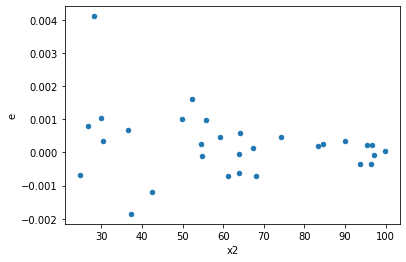

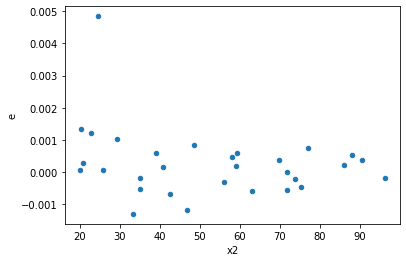

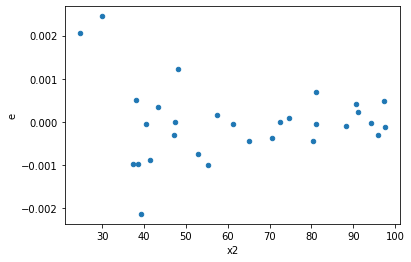

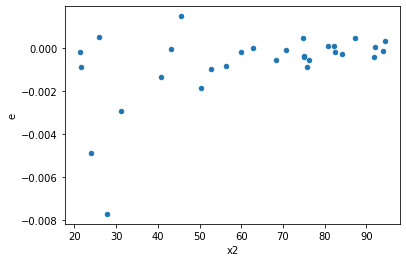

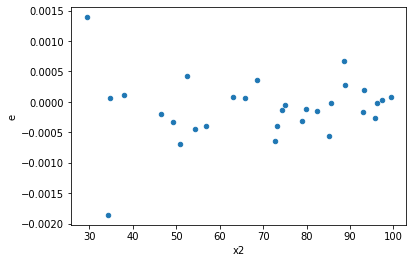

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
59.0,10.0,10.0,2.3413440302118296e-06,2.748549746854698e-06,2.3413440302118295e-07,2.748549746854698e-07,1.1739196424739116,0.8047886542910618,0.5976056728544691,0.4023943271455309,Reject001=1 : Homoscedasticity
152.0,10.0,10.0,7.792275513025603e-06,1.6440158841496e-05,7.792275513025603e-07,1.6440158841495999e-06,2.109802048710233,0.25481098501230615,0.8725945074938469,0.12740549250615307,Reject001=1 : Homoscedasticity
308.0,10.0,10.0,1.1565790799474529e-05,1.8426161345015103e-05,1.1565790799474528e-06,1.8426161345015102e-06,1.5931605252493641,0.4745512013706146,0.7627243993146927,0.2372756006853073,Reject001=1 : Homoscedasticity
338.0,10.0,10.0,1.2416063511773397e-05,1.342098512525837e-05,1.2416063511773396e-06,1.342098512525837e-06,1.0809372159325754,0.9044756298162522,0.5477621850918739,0.4522378149081261,Reject001=1 : Homoscedasticity
399.0,10.0,10.0,6.818093494846853e-06,7.436366362221826e-06,6.818093494846853e-07,7.436366362221827e-07,1.0906811952406148,0.8935266056264526,0.5532366971867737,0.4467633028132263,Reject001=1 : Homoscedasticity
543.0,10.0,10.0,2.113785881887769e-06,2.4859511154726696e-06,2.1137858818877687e-07,2.4859511154726697e-07,1.1760657201724376,0.8026130561108689,0.5986934719445656,0.40130652805543443,Reject001=1 : Homoscedasticity
570.0,10.0,10.0,2.686187431883798e-06,4.5169496914615566e-06,2.686187431883798e-07,4.5169496914615566e-07,1.6815467297059992,0.4253596334554013,0.7873201832722994,0.21267981672770064,Reject001=1 : Homoscedasticity
601.0,10.0,10.0,6.557141012897752e-06,9.178660223775882e-06,6.557141012897752e-07,9.178660223775883e-07,1.3997960705316022,0.6048156512929022,0.6975921743535489,0.3024078256464511,Reject001=1 : Homoscedasticity
644.0,10.0,10.0,4.931258069351883e-06,6.9147836056213105e-06,4.931258069351883e-07,6.91478360562131e-07,1.4022351919882632,0.6029560228822834,0.6985219885588583,0.3014780114411417,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,7.449661552752074e-06,4.588509324366415e-06,7.449661552752074e-07,4.588509324366415e-07,0.6159352732838334,0.456974217858908,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,2.8660291041310714e-06,1.0970469785567207e-06,2.8660291041310713e-07,1.0970469785567206e-07,0.38277593796079945,0.14578367630634498,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,7.15274729120363e-05,2.5328517350526544e-06,7.152747291203629e-06,2.5328517350526545e-07,0.03541089363198289,1.0504057548744683e-05,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,1.0509730297433747e-05,2.231752705889949e-06,1.0509730297433746e-06,2.231752705889949e-07,0.2123510920575094,0.0222155055213684,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,4.139722432528938e-05,2.4339441613260807e-06,4.139722432528938e-06,2.433944161326081e-07,0.058794863689428455,0.00011013045133557604,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,1.8825940812983627e-05,1.7428952608202028e-06,1.8825940812983627e-06,1.7428952608202027e-07,0.09257945077667437,0.0008221102196717792,Reject001=0 : Heteroscedasticity
6.0,10.0,10.0,2.076521714500865e-05,3.8120305302618997e-06,2.076521714500865e-06,3.8120305302618995e-07,0.18357768684245132,0.013054306673778836,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,1.6243893663549185e-05,3.594430467973359e-06,1.6243893663549185e-06,3.594430467973359e-07,0.22127887207481262,0.025709029075920625,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,5.835581754814834e-05,3.0059323757186665e-06,5.835581754814834e-06,3.0059323757186663e-07,0.051510414934012795,6.01920754560933e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    709
Reject001=1 : Homoscedasticity      291
Name: Result_test, dtype: int64